# Markov inequality illustration

If time between earthquakes is in average $20$ years, which is the probability of observing times bewteen earthquakes bigger than $50$ years (an anomalous time).

Mean value 20.416350872857787
Probability of X bigger and equal than a (red area) 0.08370000000000001
Upper bound of the probability ->> Ans:It should be lower than: 0.40832701745715577
Markov inequality: True


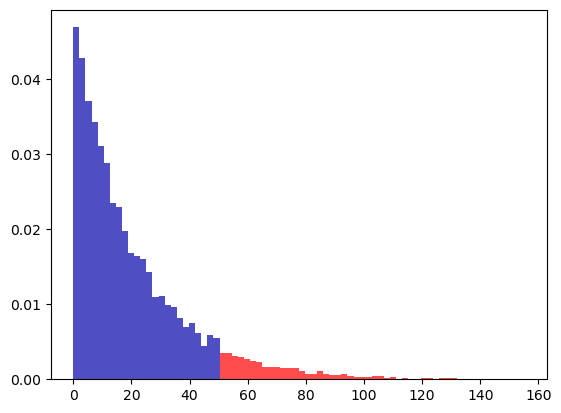

In [1]:
import numpy as np
import matplotlib.pyplot as plt

nSamples = 10000
a = 50

meanDistribution = 20 # Desconocido!!
samples = np.random.exponential(scale=meanDistribution, size=(nSamples))

# Esto lo conozco
EX =np.mean(samples)
n, bins, patches = plt.hist(x=samples, bins='auto', color='#0504aa',
                            alpha=0.7,density=True)

n = n/np.sum(n)
indexBin = bins[:-1]
px_be_a = np.sum(n[indexBin>=a])

for i in range(len(indexBin)):
    if indexBin[i]>=a:
        patches[i].set_facecolor('r')
print('Mean value',EX)
print('Probability of X bigger and equal than a (red area)',px_be_a)
print('Upper bound of the probability ->> Ans:It should be lower than:',EX/a)
print('Markov inequality:',px_be_a<EX/a)

# Hoeffding inequality

Suppose that we have a bin with numbers with some "unknown" distribution with a mean $\mu$, which naturally is also unknown. 

**Our task:** *to discover the value of the "unknown" mean $\mu$*

Strategy:
1. We can extract from this bin a **random** sample of size $n$ to someway observe the bin content
2. We can compute the mean of this sample, let's called $\nu$
3. Because this sample provides observation of the "unknown" distribution of the bin, it should be reasonable to assume that $\nu$ should provide an estimate for $\mu$, i.e., $\mu \approx \nu$

Nice!! Now we can said something about $\mu$. But, how good is this estimation?. For instance:

1. ¿Our estimation $\nu$ is close enough to the unknown mean $\mu$, i.e., $|\nu-\mu|$ is lower than some $\epsilon$ value?
2. ¿How close enough we are is our estimation to the "unknown" $\mu$ if sample size ($n$) is small or is large?

The Hoeffding's inequality answers these questions by providing an upper bound for the:

## Probability that the mean of the sample ($\nu$) deviates more than a value $\epsilon$  from the **unkown** mean ($\mu$), i.e., an upper bound for $Pr(|\nu-\mu| \geq \epsilon$).

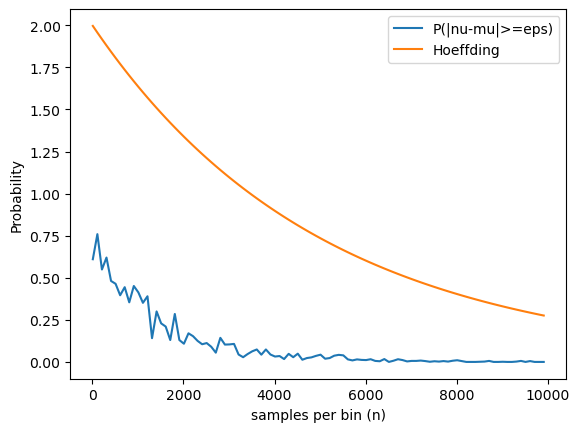

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import numpy as np

unkownParam = 0.1

# Suppose that we have a bin with an unknown distribution
def unknownDistr(nsamples):
    # U[0,1]
    #sampleBin = np.random.uniform(size=nsamples)
    # Red and green samples
    sampleBin = np.random.binomial(1,unkownParam,nsamples)
    return sampleBin

# We can extract a sample from this unknown distribution
n = 1000

# We can quantify how probable is to have samples with mean that deviates more than 
# an epsilon value from the unknown mean
eps = 0.01
nVals = range(10,10000,100)
hoeff = []
pacum = []

for n in nVals:
    meanDistribution = []
    # We can sample many times the unknown distribution and compute the means
    for nSim in range(1000):
        sampleBinDist = unknownDistr(n)
        meanDistribution.append(np.mean(sampleBinDist))

    nVal, bins = np.histogram(meanDistribution,density=True);

    nVal = nVal/np.sum(nVal)
    indexBin = bins[:-1]

    # Compute the probability of observing anomalus samples, i.e., samples with
    # means that deviates more than (mu+eps) or less than (mu-eps)
    px_be_epsplus = np.sum(nVal[indexBin>=(unkownParam+eps)])
    px_be_epsminus = np.sum(nVal[indexBin<=(unkownParam-eps)])


    #print('mu-eps',(unkownParam-eps))
    #print('mu+eps',(unkownParam+eps))
    #print('Prob having highly deviated mean samples ',px_be_epsminus+px_be_epsplus)
    probDeviation = px_be_epsminus+px_be_epsplus
    hoeffBound = 2*math.exp(-2*n*(eps**2))
    pacum.append(probDeviation)
    hoeff.append(hoeffBound)

plt.plot(nVals,pacum)
plt.plot(nVals,hoeff)
plt.xlabel('samples per bin (n)')
plt.ylabel('Probability')
plt.legend(['P(|nu-mu|>=eps)','Hoeffding'])